In [5]:
#Activity 1
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(model, X_train, y_train, cv=5)
average_accuracy = np.mean(scores)
print('Average accuracy: ', average_accuracy)

Average accuracy:  0.9619047619047618


In [6]:
#Acitivity 2
svm = SVC()
y_pred_svm = cross_val_predict(svm, X, y, cv=5)
accuracy_svm = accuracy_score(y, y_pred_svm)
recall_svm = recall_score(y, y_pred_svm, average='weighted')
precision_svm = precision_score(y, y_pred_svm, average='weighted')
f1_svm = f1_score(y, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y, y_pred_svm)

print("SVM:")
print(f"Accuracy: {accuracy_svm:.3f}")
print(f"Recall: {recall_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"F1 Score: {f1_svm:.3f}")
print("Confusion Matrix:")
print(cm_svm)

d) SVM:
Accuracy: 0.967
Recall: 0.967
Precision: 0.967
F1 Score: 0.967
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


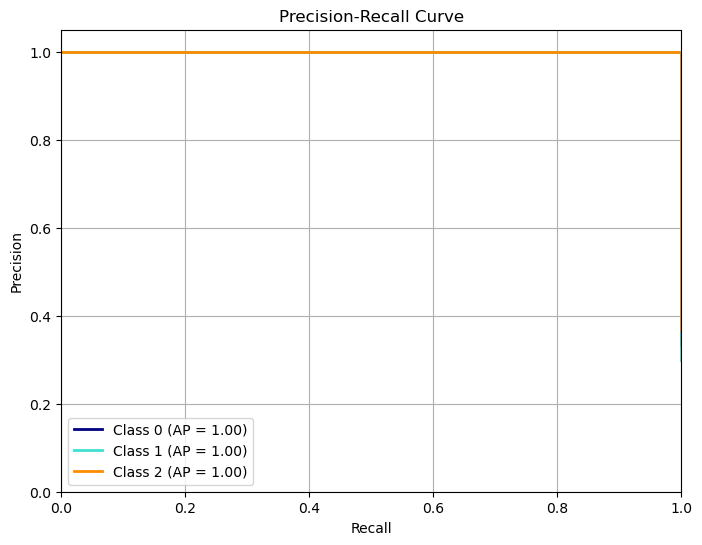

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = rf_classifier.predict_proba(X_test)

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):  # Three classes in the Iris dataset
    precision[i], recall[i], _ = precision_recall_curve((y_test == i), y_scores[:, i])
    average_precision[i] = average_precision_score((y_test == i), y_scores[:, i])

# Plot the precision-recall curves for each class
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
